# Aditya Mohan

#### Input: 
##### You have been given a link to a csv file containing features and labels. The final column represents the label (as a string) and all other columns represent different hand crafted features (floating point values). 

### Problem Statement: 
#### You have to train different classifiers on this dataset and predict the labels correspoding to the feature vectors. Not all of the features are contrbuting for an improvement in final classification accuracy. Your task is to try different training algorithms and features selection approaches to show which algorithm suits the task best and which features best define the dataset. Divide the dataset into train and validation set with 80/20 ratio and observe the validation accuracy for different algorithms. 

#### Output: 
##### Share your code (preferably a jupyter notebook) with some visualization of your resultant accuracies and a brief report over the feature selection process describing which features were most useful and the ones which didn’t contribute much.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Import the csv file in pandas

train = pd.read_csv("C://Users//Aditya//Desktop//Crisp//features_phase6a.csv")

In [3]:
train.head()

,FG1,FG2,FG3,FG4,FG5,FG6,FG7,FG8,FG9,FG10,...,NER_LOC,NER_OTH,SNER_ORG,SNER_PST,SNER_ADD,SNER_CITY,SNER_NAME,POS,SEP,LABEL
0,-1.23830,0.99487,-0.73677,1.07730,0.25410,0.081738,0.17186,0.59812,-0.43664,0.029587,...,0,2,2,0,0,0,0,1,1,Others
1,-1.44060,0.58249,-1.29030,0.64414,-0.38313,-0.413500,-1.23140,-0.34478,0.76907,-0.921770,...,0,12,5,0,0,0,0,2,1,abstract
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,...,0,26,0,0,6,0,0,3,1,authors
3,2.02380,-0.51973,-1.12920,0.26308,0.18482,-0.051798,-0.00002,-0.15213,-1.88080,0.437770,...,2,26,15,0,5,0,0,4,1,affiliation
4,0.90512,0.13008,1.09170,0.52514,-0.21762,-0.222880,-0.69978,-0.60544,0.80407,-0.315140,...,0,6,0,0,0,0,0,5,1,correspondingauthor


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17337 entries, 0 to 17336
Columns: 135 entries, FG1 to LABEL
dtypes: float64(103), int64(31), object(1)
memory usage: 17.9+ MB


In [5]:
train.describe()

,FG1,FG2,FG3,FG4,FG5,FG6,FG7,FG8,FG9,FG10,...,NER_ORG,NER_LOC,NER_OTH,SNER_ORG,SNER_PST,SNER_ADD,SNER_CITY,SNER_NAME,POS,SEP
count,17337.000000,17337.000000,17337.000000,17337.000000,17337.000000,17337.000000,17337.000000,17337.000000,17337.000000,17337.000000,...,17337.000000,17337.000000,17337.000000,17337.000000,17337.000000,17337.00000,17337.000000,17337.000000,17337.000000,17337.000000
mean,0.054949,0.216849,-0.018675,0.122853,0.108143,0.131839,-0.048361,-0.348987,-0.066166,-0.024138,...,0.085078,0.431332,21.112707,3.731788,0.026302,0.94307,0.125800,0.166465,11.075734,0.774990
std,0.531905,0.524361,0.618291,0.532737,0.539209,0.559922,0.617425,0.580215,0.647401,0.542228,...,0.537663,1.038387,42.273584,4.806289,0.165355,2.78561,0.390135,1.162887,9.326332,0.417601
min,-2.835500,-2.193600,-2.466000,-2.702200,-2.461600,-2.888700,-2.310500,-2.553100,-2.379700,-2.272100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,-0.236800,0.000000,-0.464890,-0.242410,-0.217620,-0.151630,-0.496880,-0.674350,-0.353810,-0.315140,...,0.000000,0.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.000000,1.000000
50%,0.000000,0.130080,0.000000,0.000000,0.082448,0.022945,-0.009358,-0.262560,0.000000,0.000000,...,0.000000,0.000000,9.000000,3.000000,0.000000,0.00000,0.000000,0.000000,9.000000,1.000000
75%,0.418000,0.571380,0.348590,0.525140,0.498890,0.526640,0.280730,0.000000,0.229930,0.174850,...,0.000000,0.000000,18.000000,5.000000,0.000000,0.00000,0.000000,0.000000,15.000000,1.000000
max,2.908400,2.472200,2.222500,3.134500,2.317700,3.077600,2.494700,2.377700,3.311300,2.765000,...,25.000000,29.000000,603.000000,107.000000,2.000000,80.00000,3.000000,37.000000,75.000000,1.000000


In [6]:
train.shape

(17337, 135)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

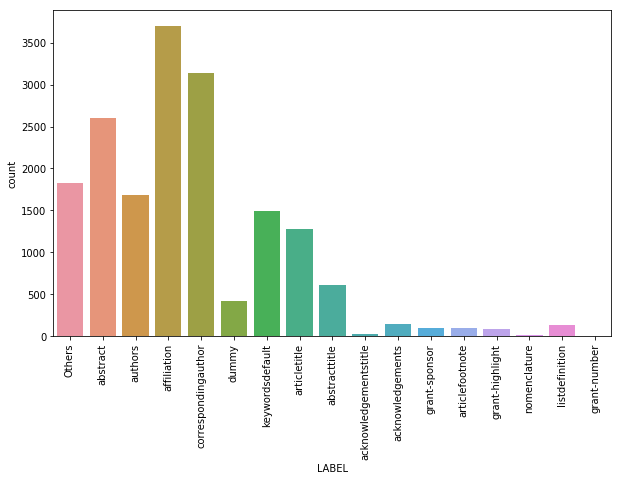

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(train["LABEL"])
plt.xticks(rotation=90)

In [8]:
# Checking the missing values

train.isnull().sum()

FG1          0
FG2          0
FG3          0
FG4          0
FG5          0
FG6          0
FG7          0
FG8          0
FG9          0
FG10         0
FG11         0
FG12         0
FG13         0
FG14         0
FG15         0
FG16         0
FG17         0
FG18         0
FG19         0
FG20         0
FG21         0
FG22         0
FG23         0
FG24         0
FG25         0
FG26         0
FG27         0
FG28         0
FG29         0
FG30         0
            ..
CG43         0
CG44         0
CG45         0
CG46         0
CG47         0
CG48         0
CG49         0
CG50         0
C_TITLE      0
C_AUTH       0
C_AFF        0
C_ABS        0
C_HIGL       0
C_CORR       0
C_GRANT      0
C_FUND       0
C_KEYW       0
C_KEYSW      0
NER_PER      0
NER_ORG      0
NER_LOC      0
NER_OTH      0
SNER_ORG     0
SNER_PST     0
SNER_ADD     0
SNER_CITY    0
SNER_NAME    0
POS          0
SEP          0
LABEL        0
Length: 135, dtype: int64

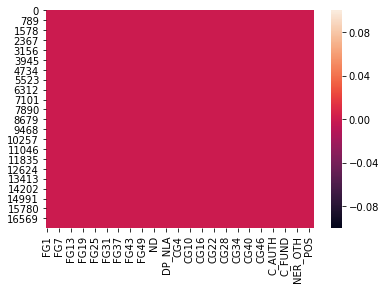

In [9]:
sns.heatmap(train.isnull())

##### There is no missing values in the data.

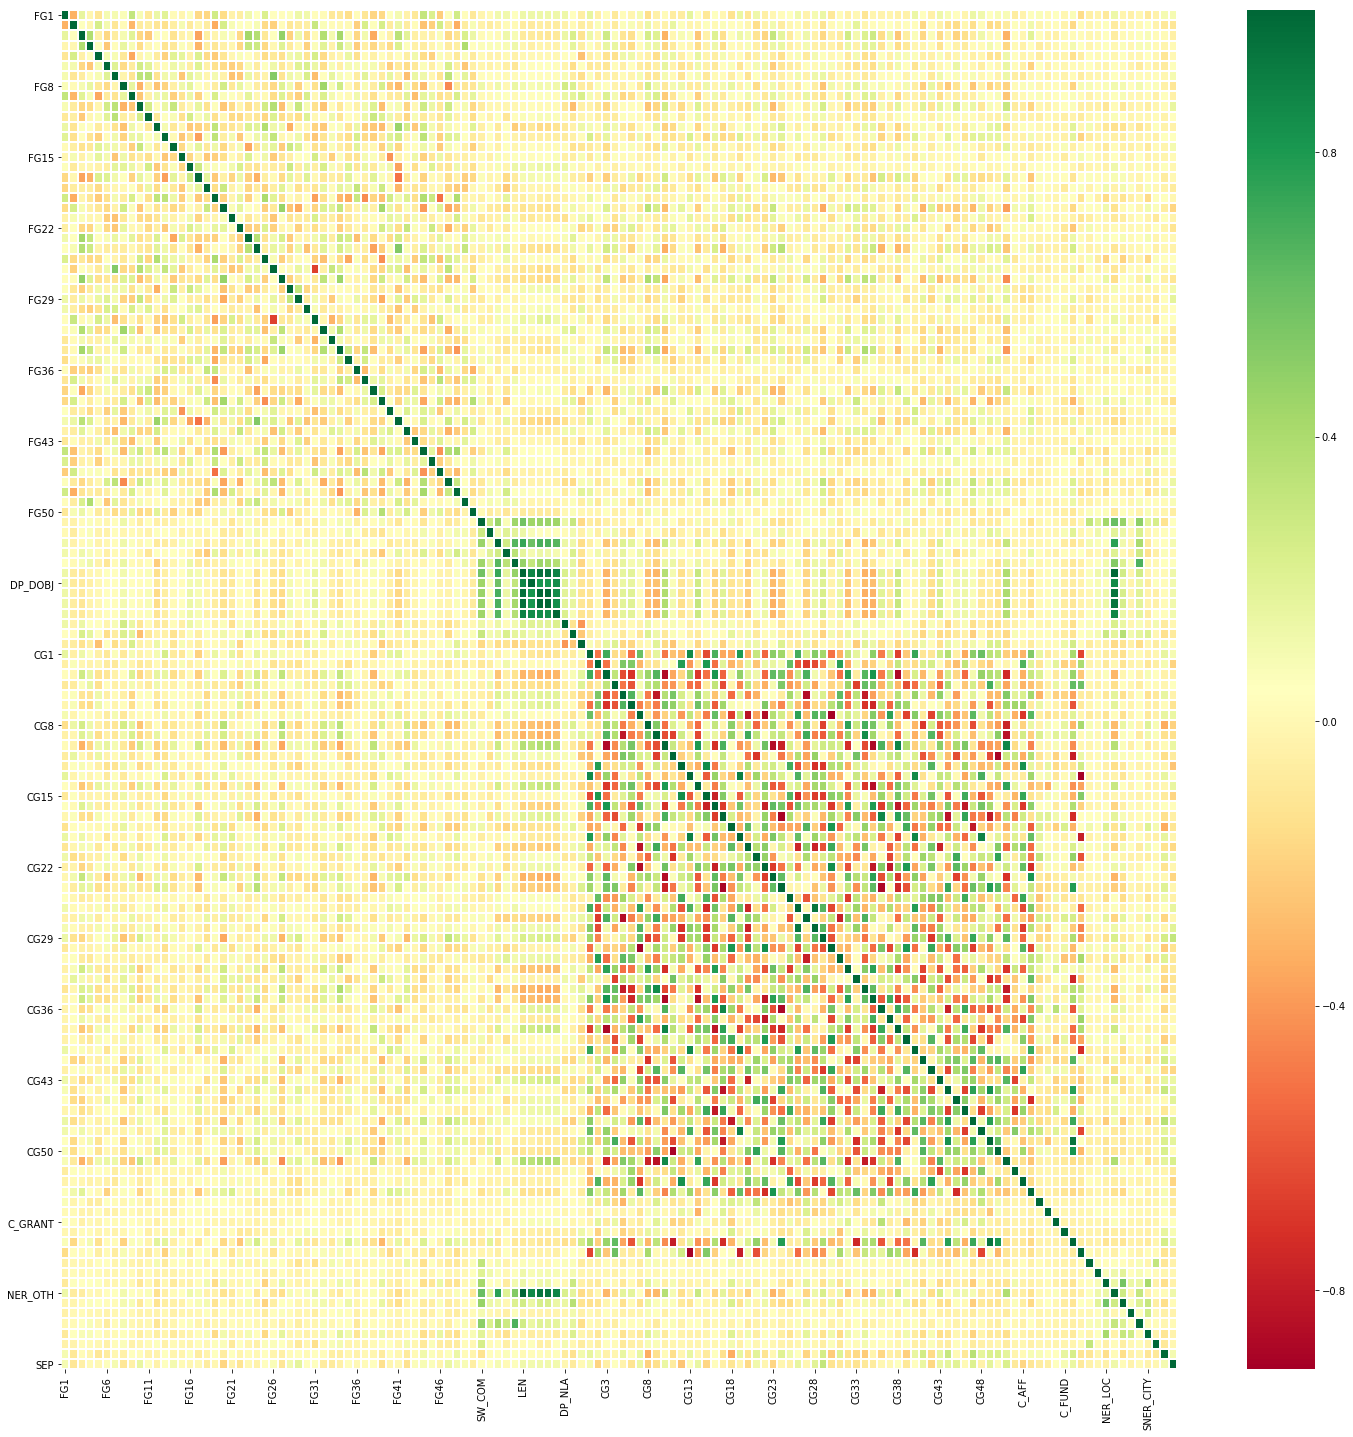

In [10]:
sns.heatmap(train.corr(),linewidth=1,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(25,25)
#sns.set(font_scale=1.5)
plt.show()

### Few features that shows good correlation with eachother are shown below

In [11]:
np.corrcoef(train.LEN, train.NER_OTH)

array([[1.        , 0.99470757],
       [0.99470757, 1.        ]])

In [12]:
np.corrcoef(train.LEN, train.DP_DOBJ)

array([[1.        , 0.87411196],
       [0.87411196, 1.        ]])

In [13]:
np.corrcoef(train.NER_OTH,train.DP_DOBJ)

array([[1.        , 0.85974539],
       [0.85974539, 1.        ]])

In [14]:
np.corrcoef(train.NER_OTH, train.DP_PREP)

array([[1.        , 0.94338381],
       [0.94338381, 1.        ]])

In [15]:
np.corrcoef(train.NER_OTH, train.DP_POBJ)

array([[1.        , 0.94277409],
       [0.94277409, 1.        ]])

In [16]:
np.corrcoef(train.CG49, train.C_KEYW)

array([[1.        , 0.94684823],
       [0.94684823, 1.        ]])

In [17]:
np.corrcoef(train.CG1, train.CG13)

array([[1.        , 0.85839535],
       [0.85839535, 1.        ]])

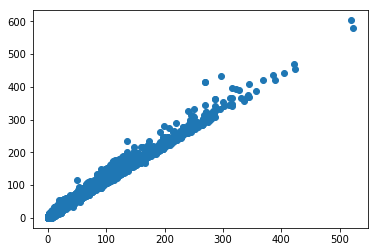

In [18]:
plt.scatter(train.LEN, train.NER_OTH)

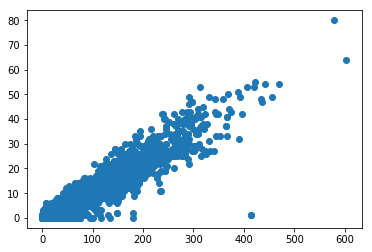

In [19]:
plt.scatter(train.NER_OTH, train.DP_PREP)

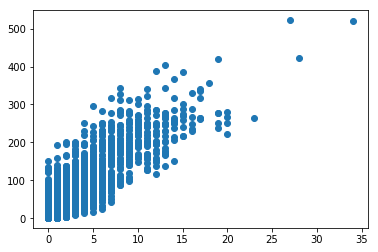

In [20]:
plt.scatter(train.DP_DOBJ, train.LEN)

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


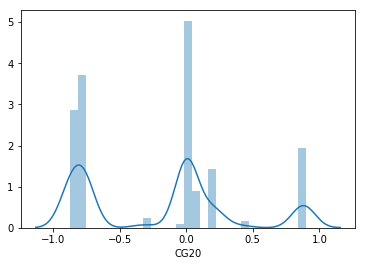

In [21]:
sns.distplot(train.CG20)

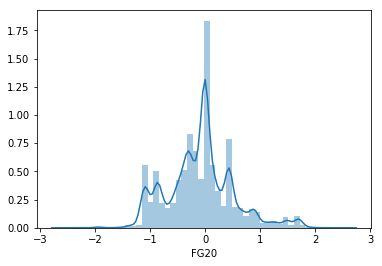

In [22]:
sns.distplot(train.FG20)

In [23]:
newtrain = train.drop("LABEL", axis =1)

newtrain.head()

,FG1,FG2,FG3,FG4,FG5,FG6,FG7,FG8,FG9,FG10,...,NER_ORG,NER_LOC,NER_OTH,SNER_ORG,SNER_PST,SNER_ADD,SNER_CITY,SNER_NAME,POS,SEP
0,-1.23830,0.99487,-0.73677,1.07730,0.25410,0.081738,0.17186,0.59812,-0.43664,0.029587,...,0,0,2,2,0,0,0,0,1,1
1,-1.44060,0.58249,-1.29030,0.64414,-0.38313,-0.413500,-1.23140,-0.34478,0.76907,-0.921770,...,0,0,12,5,0,0,0,0,2,1
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,...,0,0,26,0,0,6,0,0,3,1
3,2.02380,-0.51973,-1.12920,0.26308,0.18482,-0.051798,-0.00002,-0.15213,-1.88080,0.437770,...,0,2,26,15,0,5,0,0,4,1
4,0.90512,0.13008,1.09170,0.52514,-0.21762,-0.222880,-0.69978,-0.60544,0.80407,-0.315140,...,0,0,6,0,0,0,0,0,5,1


#### Scaling the Dataset

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc = StandardScaler()

In [26]:
x = pd.DataFrame(sc.fit_transform(newtrain), columns = newtrain.columns)

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [27]:
x.head()


,FG1,FG2,FG3,FG4,FG5,FG6,FG7,FG8,FG9,FG10,...,NER_ORG,NER_LOC,NER_OTH,SNER_ORG,SNER_PST,SNER_ADD,SNER_CITY,SNER_NAME,POS,SEP
0,-2.431423,1.483793,-1.161452,1.791645,0.270695,-0.089481,0.356688,1.632386,-0.572265,0.099085,...,-0.158242,-0.415398,-0.452132,-0.360327,-0.159069,-0.338560,-0.322463,-0.143152,-1.080384,0.538832
1,-2.811765,0.697328,-2.056736,0.978536,-0.911127,-0.973984,-1.916140,0.007252,1.290173,-1.655500,...,-0.158242,-0.415398,-0.215571,0.263873,-0.159069,-0.338560,-0.322463,-0.143152,-0.973158,0.538832
2,-0.103309,-0.413561,0.030206,-0.230614,-0.200565,-0.235467,0.078330,0.601497,0.102205,0.044518,...,-0.158242,-0.415398,0.115614,-0.776461,-0.159069,1.815429,-0.322463,-0.143152,-0.865932,0.538832
3,3.701616,-1.404758,-1.796171,0.263228,0.142206,-0.327979,0.078298,0.339293,-2.803031,0.851896,...,-0.158242,1.510721,0.115614,2.344540,-0.159069,1.456431,-0.322463,-0.143152,-0.758705,0.538832
4,1.598397,-0.165481,1.795930,0.755155,-0.604168,-0.633534,-1.055088,-0.442009,1.344237,-0.536694,...,-0.158242,-0.415398,-0.357508,-0.776461,-0.159069,-0.338560,-0.322463,-0.143152,-0.651479,0.538832


In [28]:
y= train["LABEL"]
y.shape

(17337,)

In [29]:
# Divide the dataset into train and validation set with 80/20 ratio

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=123)

### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report

In [31]:
lr=LogisticRegression()

In [32]:
model_LR=lr.fit(x_train, y_train).predict(x_test)

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [33]:
accuracy_score(y_test,model_LR)

0.7848904267589388

In [34]:
cohen_kappa_score(y_test,model_LR)

0.7476554921718062

In [35]:
acc_lr = accuracy_score(y_test,model_LR)

In [36]:
cks_lr = cohen_kappa_score(y_test,model_LR)

### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()

In [38]:
model_DT=tree.fit(x_train, y_train).predict(x_test)

In [39]:
accuracy_score(y_test,model_DT)

0.8030565167243368

In [40]:
cohen_kappa_score(y_test,model_DT)

0.7710658558596087

In [41]:
acc_dt = accuracy_score(y_test,model_DT)

In [42]:
cks_dt = cohen_kappa_score(y_test,model_DT)

### Bagginng Classifier

In [43]:
from sklearn.ensemble import BaggingClassifier

In [44]:
bg = BaggingClassifier()

In [45]:
model_BC = bg.fit(x_train,y_train).predict(x_test)

In [46]:
accuracy_score(y_test,model_BC)

0.8310265282583622

In [47]:
cohen_kappa_score(y_test,model_BC)

0.8026415228466031

In [48]:
acc_bagg = accuracy_score(y_test,model_BC)

In [49]:
cks_bagg = cohen_kappa_score(y_test,model_BC)

### XGBClassifier

In [50]:
from xgboost import XGBClassifier

In [51]:
XGBR = XGBClassifier()

In [52]:
model_XGB=XGBR.fit(np.array(x_train), y_train).predict(np.array(x_test))

In [53]:
accuracy_score(y_test,model_XGB)

0.8180507497116494

In [54]:
cohen_kappa_score(y_test,model_XGB)

0.7868009384894264

In [55]:
acc_XGB = accuracy_score(y_test,model_XGB)

In [56]:
cks_XGB = cohen_kappa_score(y_test,model_XGB)

### AdaBoostClassifier

In [57]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()

In [58]:
model_ADA=ad.fit(x_train, y_train).predict(x_test)

In [59]:
accuracy_score(y_test,model_ADA)

0.3506343713956171

In [60]:
cohen_kappa_score(y_test,model_ADA)

0.1826073323339641

In [61]:
acc_ADABoost = accuracy_score(y_test,model_ADA)

In [62]:
cks_ADABoost = cohen_kappa_score(y_test,model_ADA)

### Gaussian NB

In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
gb=GaussianNB()

In [65]:
model_GNB=gb.fit(x_train, y_train).predict(x_test)

In [66]:
accuracy_score(y_test,model_GNB)

0.44809688581314877

In [67]:
cohen_kappa_score(y_test,model_GNB)

0.40322770752390036

In [68]:
acc_nb = accuracy_score(y_test,model_GNB)

In [69]:
cks_nb = cohen_kappa_score(y_test,model_GNB)

### Bernoulli NB

In [70]:
from sklearn.naive_bayes import BernoulliNB

In [71]:
bn=BernoulliNB()

In [72]:
model_BNB=bn.fit(x_train, y_train).predict(x_test)

In [73]:
accuracy_score(y_test, model_BNB)

0.5732410611303345

In [74]:
cohen_kappa_score(y_test,model_BNB)

0.5139876366372403

In [75]:
acc_bnb = accuracy_score(y_test, model_BNB)

In [76]:
cks_bnb = cohen_kappa_score(y_test,model_BNB)

###  Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
forest=RandomForestClassifier(max_depth=16, n_estimators=20)

In [79]:
model_RF=forest.fit(x_train, y_train).predict(x_test)

In [80]:
accuracy_score(y_test, model_RF)

0.8281430219146482

In [81]:
cohen_kappa_score(y_test, model_RF)

0.7987594896432982

In [82]:
acc_rf = accuracy_score(y_test, model_RF)

In [83]:
cks_rf = cohen_kappa_score(y_test, model_RF)

### Voting Classifier

In [84]:
from sklearn.ensemble import VotingClassifier

In [85]:
vc = VotingClassifier(estimators=[('tree', tree),('forest', forest), ('lr', lr), ('bg', bg), ('XGBR', XGBR)])

In [86]:
model_VC=vc.fit(x_train, y_train).predict(x_test)

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [87]:
accuracy_score(y_test, model_VC)

0.8419838523644751

In [88]:
cohen_kappa_score(y_test, model_VC)

0.8150637582325191

In [89]:
acc_vc = accuracy_score(y_test, model_VC)

In [90]:
cks_vc = cohen_kappa_score(y_test, model_VC)

## Reports of the models applied

In [91]:
accuracy_report = pd.DataFrame({'Model':['Logistic Regression', 'Decision tree','Bagging Classifier','XG-Boost','Ada-Boost','Gaussian NB','Bernoulli NB','Random Forest','Voting Classifier'],
                                'Accuracy Score':[acc_lr,acc_dt,acc_bagg,acc_XGB,acc_ADABoost,acc_nb,acc_bnb,acc_rf,acc_vc],
                               'Cohen Kappa Score':[cks_lr,cks_dt,cks_bagg,cks_XGB,cks_ADABoost,cks_nb,cks_bnb,cks_rf,cks_vc]}) 

In [92]:
accuracy_report

,Model,Accuracy Score,Cohen Kappa Score
0,Logistic Regression,0.784890,0.747655
1,Decision tree,0.803057,0.771066
2,Bagging Classifier,0.831027,0.802642
3,XG-Boost,0.818051,0.786801
4,Ada-Boost,0.350634,0.182607
5,Gaussian NB,0.448097,0.403228
6,Bernoulli NB,0.573241,0.513988
7,Random Forest,0.828143,0.798759
8,Voting Classifier,0.841984,0.815064


### From the above report we can see that Ensemble Techniques like Bagging, XGBoost, Random Forest, Voting Classifier gives more accuracy.
### Voting Classifier gives an accuracy of 84%

### We can use Random Forest technique to find the best features which define the dataset.

In [93]:
rand = forest.feature_importances_

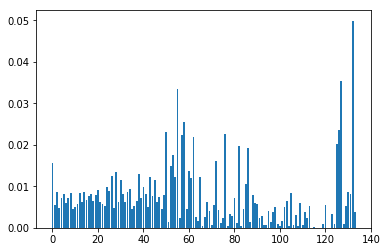

In [94]:
plt.bar(range(len(rand)),rand)
plt.show()

In [95]:
a = pd.DataFrame(list(rand))

In [96]:
a["Features"] = list(x.columns)

In [97]:
b = a.sort_values(by=0,ascending=False)

In [98]:
b

,0,Features
132,0.049908,POS
127,0.035454,SNER_ORG
55,0.033437,LEN
58,0.025444,DP_POBJ
126,0.023525,NER_OTH
50,0.023010,SW_COM
76,0.022546,CG14
57,0.022439,DP_PREP
62,0.021904,DP_NNC
125,0.020305,NER_LOC


### The top most features in the below figure contribute more to the data set.

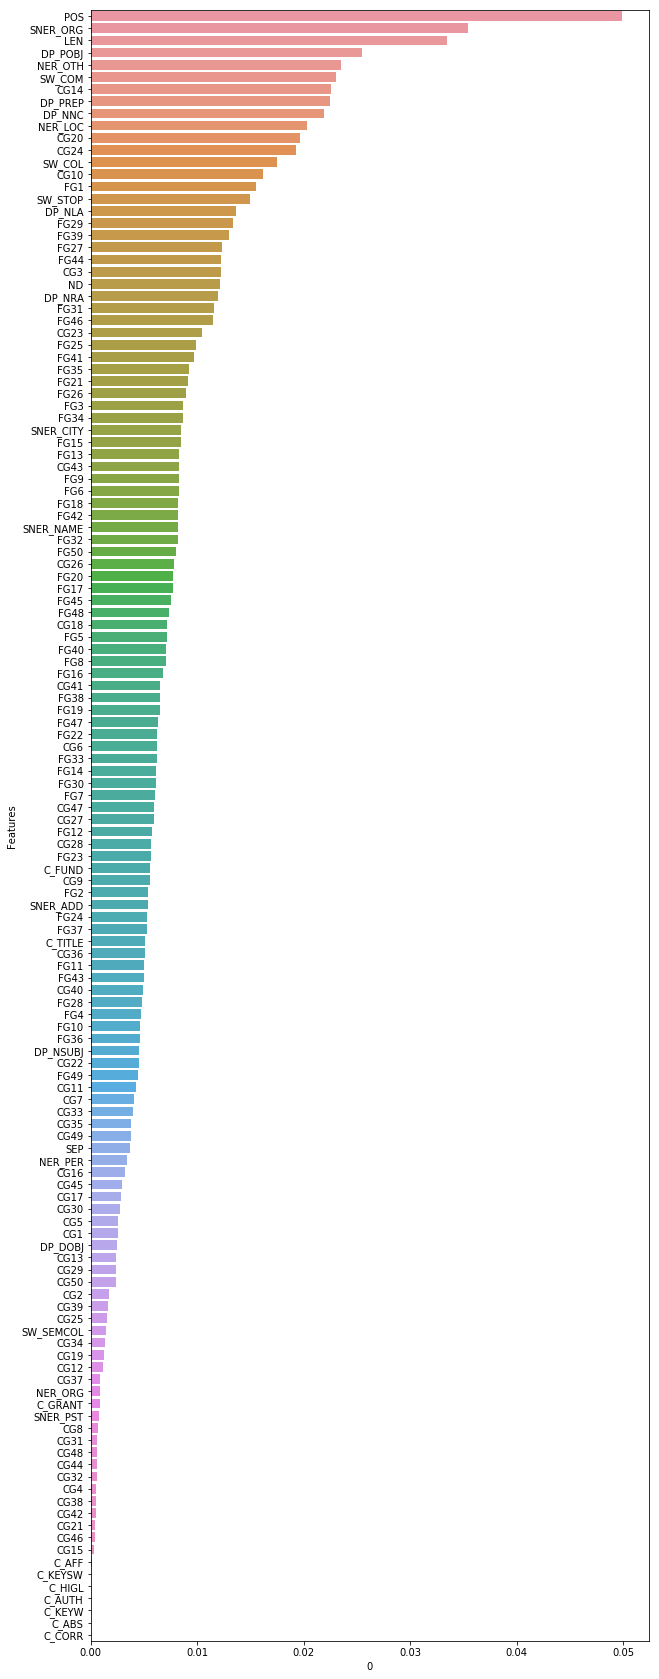

In [99]:
plt.figure(figsize=[10,30])
sns.barplot(b[0],b["Features"])


## Inference
### The data consists of 135 features with 17337 rows. 
### Used Countplot to find the unique LABEL (Target Column) with its count.
### Checked if there is any missing values in tha data and found out there is no missing values.
### Used Heatmap to find the correlation among different features in the dataset.
### Did scaling to Standardize the data.
### Divided the dataset into train and validation set with 80/20 ratio.
### Tried different training algorithms and features selection approaches to find which algorithm suits the task best and which features best define the dataset.
### After applying different algorithms, found that Ensemble Techniques like Bagging, XGBoost, Random Forest, Voting Classifier gave more accuracy.
### Voting Classifier gives an accuracy of 84% and Random Forest gave an accuracy of 83%. 
### Used Random Forest technique to find the best features which define the dataset       (Used forest.feature_importances_) .
### Used Barplot (descending order) to find the top most features in the below figure contribute more to the data set.
### Few Best features that contribute more to the Dataset are 'POS', 'LEN', 'SNER_ORG', 'SW_COM', 'DP_POBJ', 'CG5', 'NER_OTH', 'NER_LOC' etc and features that does not contribute are 'C_GRANT', 'C_AUTH', 'C_AFF', 'C_KEYSW', 'C_HIGH', 'C_CORR', 'C_TITLE' etc which are present at the bottom of the barplot.
